# Import all the Dependencies

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
import tensorflow as tf


In [2]:
# initializing the CNN

CNN_Classifier=Sequential()


In [3]:
# step 1 convolution
CNN_Classifier.add(Conv2D(32,3,3,input_shape=(64,64,3),activation='relu'))

In [4]:
#Step 2 pooling

CNN_Classifier.add(MaxPooling2D(pool_size=(2,2)))

In [ ]:
# step 1 convolution
CNN_Classifier.add(Conv2D(32,3,3,activation='relu'))

In [5]:
#Step 2 pooling

CNN_Classifier.add(MaxPooling2D(pool_size=(2,2)))

In [6]:
# flattening

CNN_Classifier.add(Flatten())

In [7]:

# step 4 Full connection

CNN_Classifier.add(Dense(units=128, activation='relu'))
CNN_Classifier.add(Dense(units=128, activation='sigmoid'))

In [8]:
#compiling the cnn()
CNN_Classifier.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

# Summary()

In [14]:
CNN_Classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 21, 21, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               102528    
                                                                 
 dense_1 (Dense)             (None, 128)               1

# Building and Compiling the Model

In [9]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
training_set = train_datagen.flow_from_directory(
        r'C:\Users\touheed\Documents\Adatasets\wheat_leaf\tain',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        r'C:\Users\touheed\Documents\Adatasets\wheat_leaf\test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='binary')


Found 407 images belonging to 3 classes.
Found 156 images belonging to 3 classes.


In [11]:
r=CNN_Classifier.fit(
        training_set,
        steps_per_epoch=len(training_set),
        epochs=100,
        validation_data=test_set,
        
        validation_steps=len(test_set))

Epoch 1/100


C:\Users\touheed\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


13/13 [==============================] - 271s 21s/step - loss: 3.0517 - accuracy: 0.4201 - val_loss: 1.1449 - val_accuracy: 0.5000
Epoch 2/100
13/13 [==============================] - 202s 16s/step - loss: 1.0293 - accuracy: 0.4988 - val_loss: 1.2151 - val_accuracy: 0.5000
Epoch 3/100
13/13 [==============================] - 223s 18s/step - loss: 1.0307 - accuracy: 0.4988 - val_loss: 1.0129 - val_accuracy: 0.5000
Epoch 4/100
13/13 [==============================] - 208s 16s/step - loss: 0.9209 - accuracy: 0.5725 - val_loss: 0.9283 - val_accuracy: 0.5000
Epoch 5/100
13/13 [==============================] - 178s 14s/step - loss: 0.8648 - accuracy: 0.5921 - val_loss: 0.8712 - val_accuracy: 0.5833
Epoch 6/100
13/13 [==============================] - 166s 13s/step - loss: 0.8278 - accuracy: 0.6290 - val_loss: 0.8332 - val_accuracy: 0.6090
Epoch 7/100
13/13 [==============================] - 168s 13s/step - loss: 0.7954 - accuracy: 0.6462 - val_loss: 0.8616 - val_accuracy: 0.6410
Epoch 8/100

13/13 [==============================] - 242s 19s/step - loss: 0.2039 - accuracy: 0.9287 - val_loss: 0.2198 - val_accuracy: 0.9359
Epoch 59/100
13/13 [==============================] - 266s 21s/step - loss: 0.1958 - accuracy: 0.9435 - val_loss: 0.2099 - val_accuracy: 0.9359
Epoch 60/100
13/13 [==============================] - 249s 20s/step - loss: 0.1835 - accuracy: 0.9410 - val_loss: 0.2577 - val_accuracy: 0.9038
Epoch 61/100
13/13 [==============================] - 388s 31s/step - loss: 0.2042 - accuracy: 0.9287 - val_loss: 0.2110 - val_accuracy: 0.9423
Epoch 62/100
13/13 [==============================] - 338s 27s/step - loss: 0.1877 - accuracy: 0.9337 - val_loss: 0.2053 - val_accuracy: 0.9359
Epoch 63/100
13/13 [==============================] - 255s 20s/step - loss: 0.2612 - accuracy: 0.8845 - val_loss: 0.3065 - val_accuracy: 0.8141
Epoch 64/100
13/13 [==============================] - 255s 20s/step - loss: 0.2024 - accuracy: 0.9115 - val_loss: 0.2087 - val_accuracy: 0.9423
Epoch

In [13]:
scores = CNN_Classifier.evaluate(training_set)

13/13 [==============================] - 122s 9s/step - loss: 0.1121 - accuracy: 0.9631


# Saving the Model

In [15]:
import os .path
if os.path.isfile(r'C:\Users\touheed\Documents\potato Model\Wheat_model.h5') is False:
    CNN_Classifier.save(r'C:\Users\touheed\Documents\potato Model\Wheat_model.h5')

# Defining Classes

In [16]:
training_set.class_indices

{'Healthy': 0, 'septoria': 1, 'stripe_rust': 2}

In [17]:
class_names = list(training_set.class_indices.keys())
class_names

['Healthy', 'septoria', 'stripe_rust']

In [18]:
count=0
for image_batch, label_batch in training_set:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.6600007  0.45190763 0.3816091 ]
  [0.6607271  0.4340472  0.37612566]
  [0.65814143 0.4226495  0.35768887]
  ...
  [0.697226   0.43982354 0.36271542]
  [0.7308482  0.46855798 0.39177346]
  [0.74035525 0.48119134 0.38877535]]

 [[0.6626231  0.44347057 0.38358802]
  [0.67140245 0.43030936 0.36261782]
  [0.67082834 0.4291722  0.35902512]
  ...
  [0.73392177 0.4679693  0.3860097 ]
  [0.7414286  0.4746685  0.3948842 ]
  [0.72459775 0.45515376 0.38878876]]

 [[0.71594006 0.6353453  0.4635876 ]
  [0.67909515 0.472707   0.38414624]
  [0.6750641  0.43364495 0.36519426]
  ...
  [0.7437447  0.48172498 0.39704853]
  [0.74500453 0.47907862 0.3966496 ]
  [0.69872457 0.4378094  0.354866  ]]

 ...

 [[0.5267055  0.30848306 0.23716636]
  [0.4752092  0.28565192 0.21941794]
  [0.49151525 0.30770373 0.24605274]
  ...
  [0.5399297  0.31401238 0.26079026]
  [0.5716037  0.34390748 0.28643027]
  [0.56976193 0.34346506 0.27913535]]

 [[0.48365015 0.2800082  0.22288004]
  [0.6440416  0.43356094 0.35521996]


# Plotting

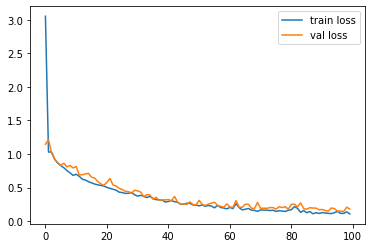

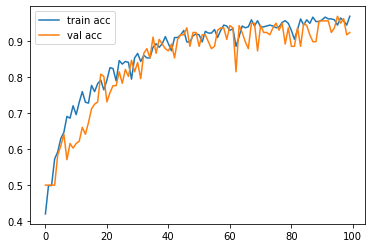

<Figure size 432x288 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

# Run prediction on a sample image

first image to predict
actual label: septoria
1/1 [==============================] - 6s 6s/step
predicted label: stripe_rust


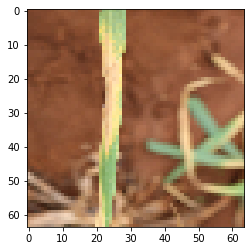

In [20]:
import numpy as np


for image_batch, label_batch in test_set:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = CNN_Classifier.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break